## Objective:

##### The objective of this assignment is to implement PCA on a given dataset and analyse the results.

## Instructions:

##### Download the wine dataset from the UCI Machine Learning Repository:
(https://archive.ics.uci.edu/ml/datasets/Wine).

- Load the dataset into a Pandas dataframe.

- Split the dataset into features and target variables.

- Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

- Implement PCA on the preprocessed dataset using the scikit-learn library.

- Determine the optimal number of principal components to retain based on the explained variance ratio.

- Visualise the results of PCA using a scatter plot.

- Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

- Interpret the results of PCA and clustering analysis.

## Deliverables:

- Jupyter notebook containing the code for the PCA implementation.

- A report summarising the results of PCA and clustering analysis.

- Scatter plot showing the results of PCA.

- A table showing the performance metrics for the clustering algorithm.

##### Load the dataset into a Pandas dataframe.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

##### Description of the data

In [4]:
# Open the file in read mode
with open('/content/wine/wine.names', 'r') as file:
    # Read all lines in the file
    lines = file.readlines()

# Process each line
names = [line.strip() for line in lines]

# Print the names
for name in names:
    print(name)


1. Title of Database: Wine recognition data
Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
(a) Forina, M. et al, PARVUS - An Extendible Package for Data
Exploration, Classification and Correlation. Institute of Pharmaceutical
and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.

(b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
(c) July 1991
3. Past Usage:

(1)
S. Aeberhard, D. Coomans and O. de Vel,
Comparison of Classifiers in High Dimensional Settings,
Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
Mathematics and Statistics, James Cook University of North Queensland.
(Also submitted to Technometrics).

The data was used with many others for comparing various
classifiers. The classes are separable, though only RDA
has achieved 100% correct classification.
(RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
(All results using the leave-one-out technique)

In a classification context, this 

In [5]:
df = pd.read_csv(filepath_or_buffer="/content/wine/wine.data", names=["class", "Alcohol","Malic acid","Ash","Alcalinity of ash"
                                                                ,"Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols"
                                                                ,"Proanthocyanins","Color intensity","Hue",
                                                                "OD280/OD315 of diluted wines","Proline"])
df

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


##### Target variable types

In [6]:
df["class"].value_counts()

class
2    71
1    59
3    48
Name: count, dtype: int64

##### So there are 3 types of wine classified as Class 1, 2 and 3

##### Description of the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [8]:
df.isna().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

##### So there are no null values in the dataset

##### Split the dataset into features and target variables.

In [9]:
X = df.drop(columns=["class"], inplace=False)
Y = df["class"]

In [10]:
print(X.shape)
print(Y.shape)

(178, 13)
(178,)


##### Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

###### Let's first look at the description of the numerical data values and their ranges

In [11]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


##### Here we cam observe that some of the features' values range very high while others don't. We need to perform scaling as these high values can otherwise influence the model in a negative way.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,-8.382808e-16,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
Malic acid,178.0,-1.197544e-16,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
Ash,178.0,-8.370333e-16,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
Alcalinity of ash,178.0,-3.991813e-17,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
Magnesium,178.0,-3.991813e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
Total phenols,178.0,0.000000e+00,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
Flavanoids,178.0,-3.991813e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
Nonflavanoid phenols,178.0,3.592632e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
Proanthocyanins,178.0,-1.197544e-16,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
Color intensity,178.0,2.494883e-17,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


##### There are no missing values in the dataset and hence no need for data imputation.

##### Implement PCA on the preprocessed dataset using the scikit-learn library.

In [13]:
from sklearn.decomposition import PCA

components = 6
pca = PCA(n_components=components)
X_pca = pca.fit_transform(X)

In [14]:
pca_df = pd.DataFrame(X_pca, columns=['PC'+str(i + 1) for i in range(components)])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783


##### Determine the optimal number of principal components to retain based on the explained variance ratio.

##### Let's first see how much explained variance is preserved by these 6 components as shown above

In [15]:
explained_variance_ratio_ = pca.explained_variance_ratio_
print(f"Explained variance with {components} components:{explained_variance_ratio_}")

Explained variance with 6 components:[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823]


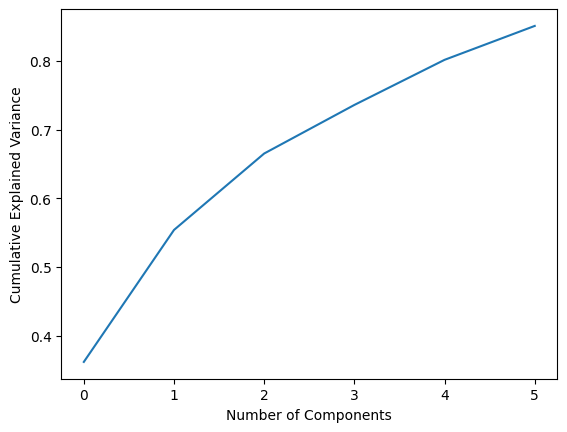

In [16]:
plt.plot(np.cumsum(explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

##### Visualise the results of PCA using a scatter plot.

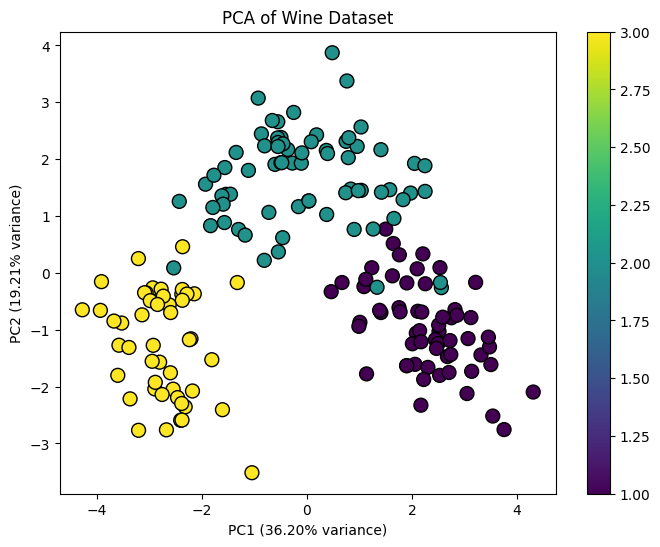

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=Y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel(f'PC1 ({explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({explained_variance_ratio_[1]*100:.2f}% variance)')
plt.title('PCA of Wine Dataset')
plt.colorbar()
plt.show()

##### Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

##### Performing K-Means clustering on the PCA transformed data

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_df)
labels = kmeans.predict(pca_df)

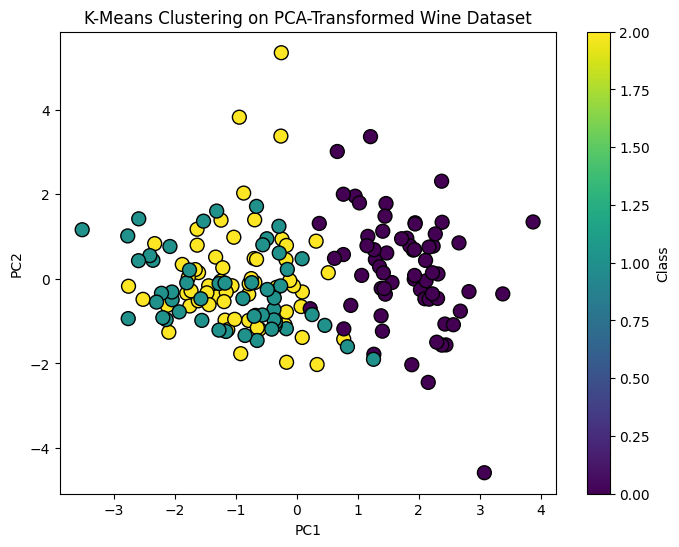

In [27]:
# Create a DataFrame with the PCA results and cluster labels
pca_df = pd.DataFrame(data=X_pca, columns=['PC' + str(i) for i in range(components)])
pca_df['Class'] = labels

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Class'], cmap='viridis', edgecolor='k', s=100)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering on PCA-Transformed Wine Dataset')
plt.colorbar(label='Class')
plt.show()

##### Interpret the results of PCA and clustering analysis.

##### Interpretation of Clustering Results

- K-means Clustering helped to identify pattern without the target variables.
- Actual Clusters and Predicted clusters are very similar excluding some exceptions.
- PC1 and PC2 are enough to explore this data